# **Modul 11 - Object Detection**

Nama : Alfan Olivan

NIM : 2141720078

## **Latihan Praktikum**

1. Import Library

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

2. Implementasi Template Matching

In [28]:
# Membuat function
def match_and_visualize(img, template, method, method_name):
    img = img.copy()
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    w, h = template.shape[::-1]

    # Apply template matching
    res = cv2.matchTemplate(img_gray, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Draw rectangle on the original image
    cv2.rectangle(img, top_left, bottom_right, (0, 0, 255), 2)

    # Plot matching result
    plt.figure(figsize=(15, 5))
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

    # Plot detected point on the original image
    plt.subplot(122), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

    # Add title to the overall plot
    plt.suptitle(method_name, fontsize=20)

    # Display the plot
    plt.show()

    # Return matching result image and detected point image
    return res, img

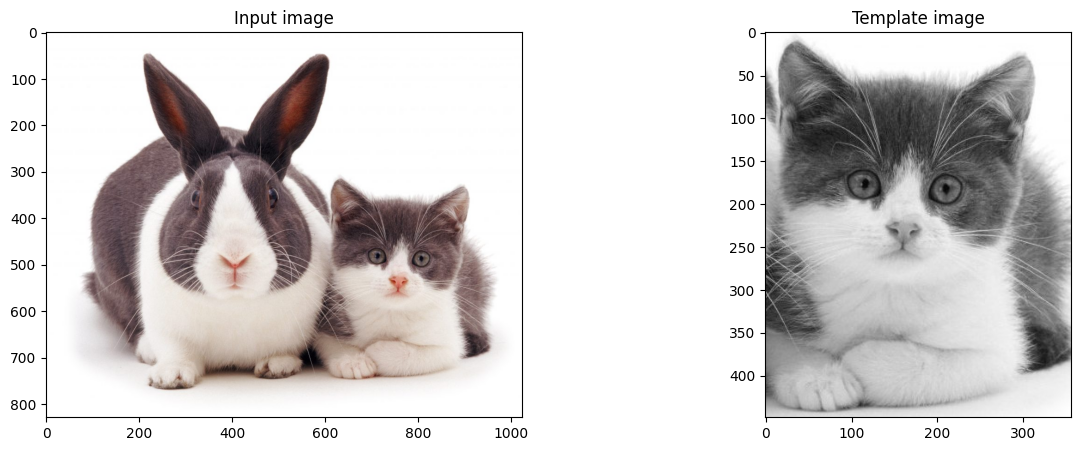

In [7]:
# Load citra input
img = cv2.imread('/content/drive/MyDrive/PCVK/Object_Detection/cats_and_bunnies.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Load citra template
template = cv2.imread('/content/drive/MyDrive/PCVK/Object_Detection/cat2_templatejpg.jpg',0)

# Dimensi citra
w, h = template.shape[::-1]

# Print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axarr[0].set_title("Input image")
axarr[1].imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB)), axarr[1].set_title("Template image")
plt.show()


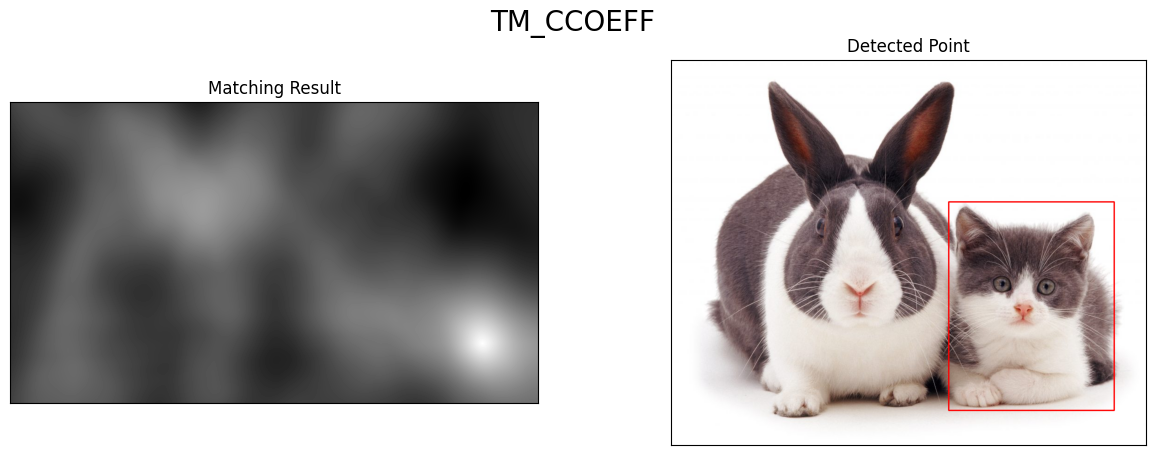

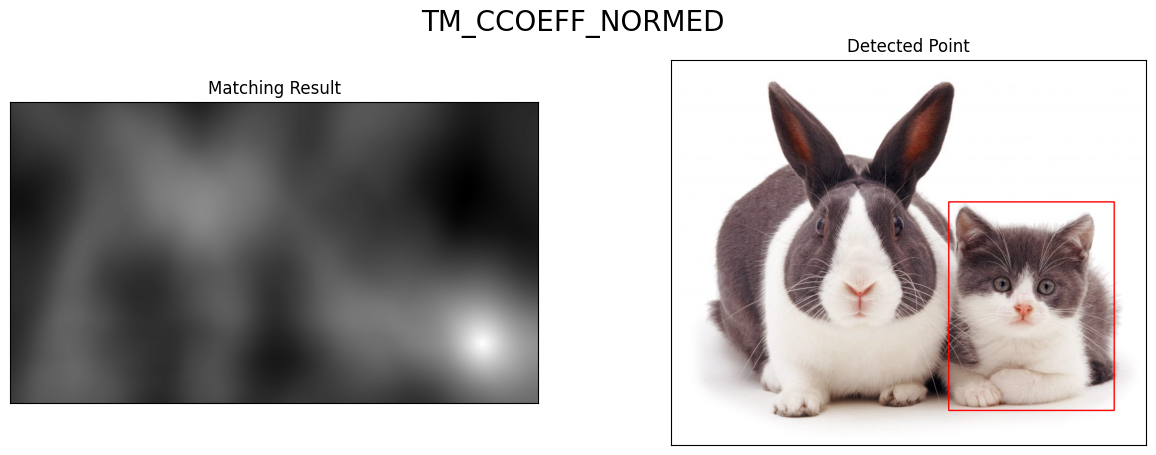

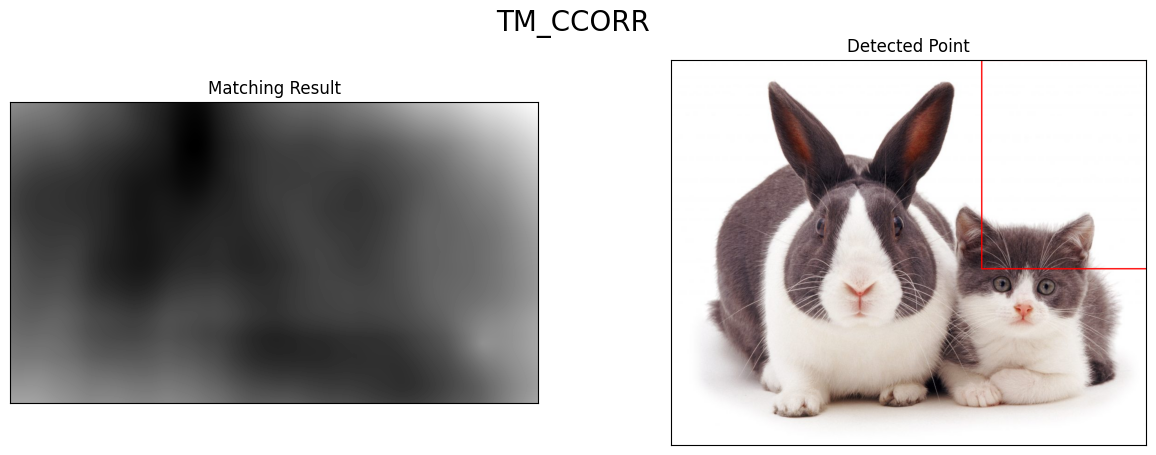

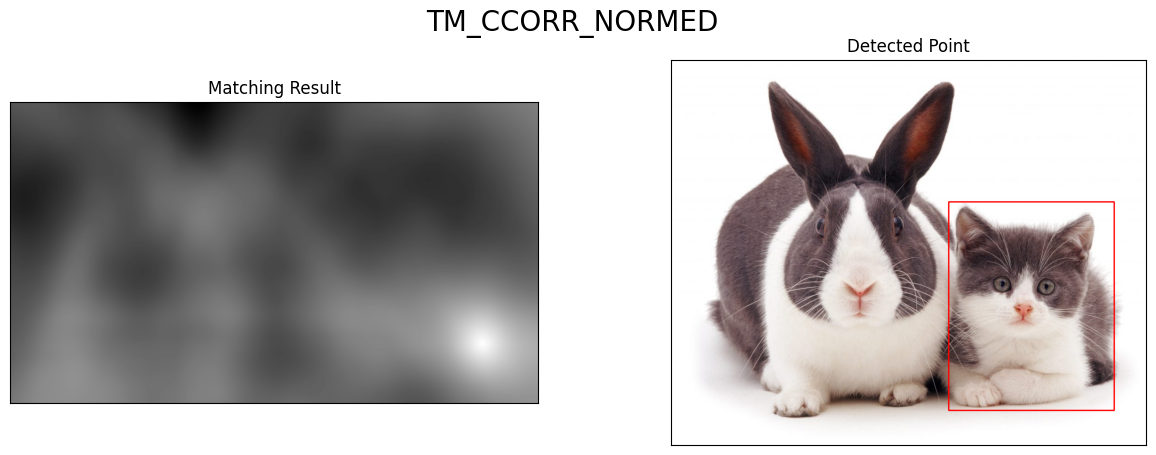

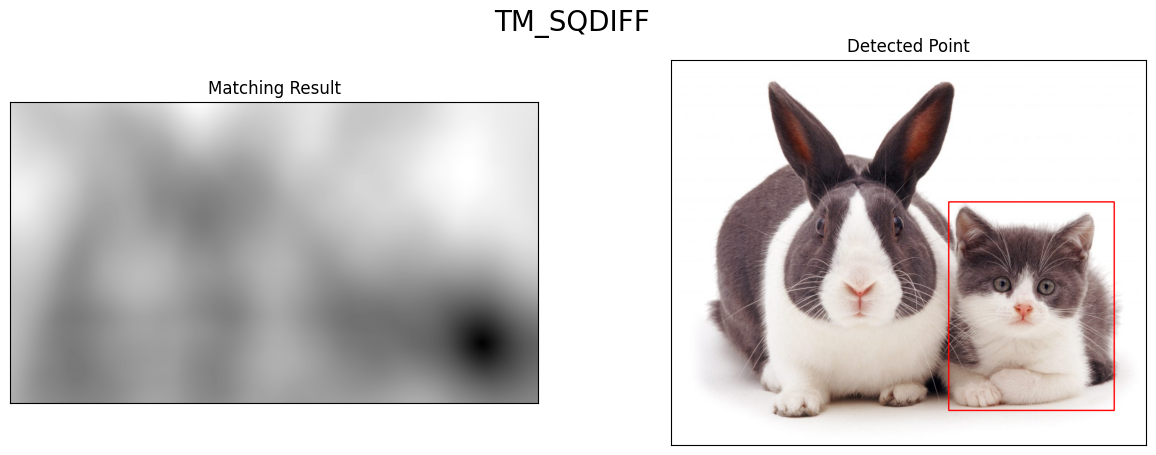

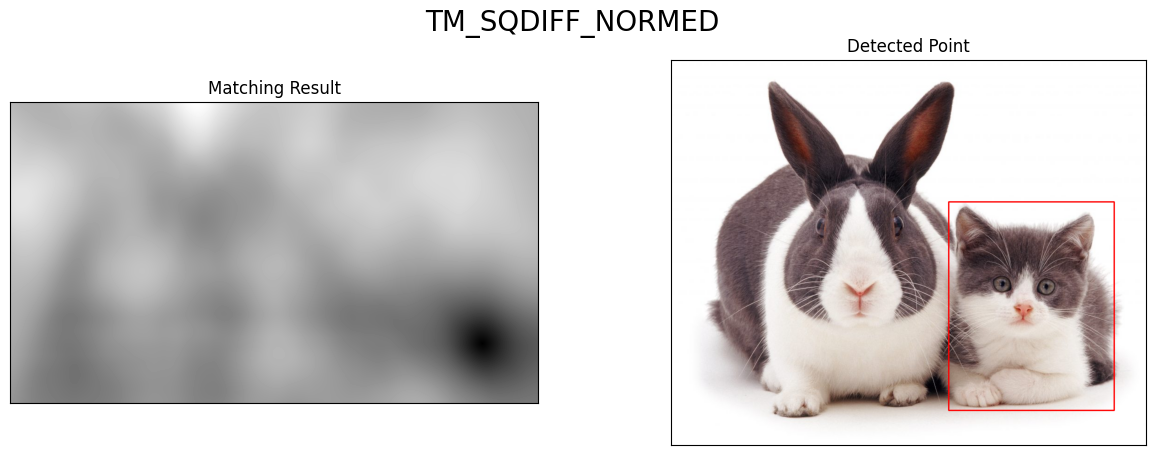

In [29]:
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for method_str in methods:
    # Extract method name from the string (e.g., 'cv.TM_CCOEFF' to 'TM_CCOEFF')
    method_name = method_str.split('.')[-1]
    method = eval(method_str)
    result_image, detected_point_image = match_and_visualize(img, template, method, method_name)


3. Template Matching Tanpa Library

In [95]:
from skimage.feature import match_template

def template_matching(main_image, template, threshold):
    # Perform template matching
    result = match_template(main_image, template)

    # Find locations where the result is above the threshold
    locations = np.where(result >= threshold)

    # Create a copy of the main image to draw rectangles on
    matched_image = main_image.copy()

    # Get the dimensions of the template
    height, width = template.shape

    # Draw rectangles around the matched regions
    for loc in zip(*locations[::-1]):
        rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=0.1)
        plt.gca().add_patch(rect)

    # Show the matched image
    plt.imshow(matched_image, cmap=plt.cm.gray)
    plt.title('Template Matching Result')
    plt.show()

    # Return the matched image
    return matched_image

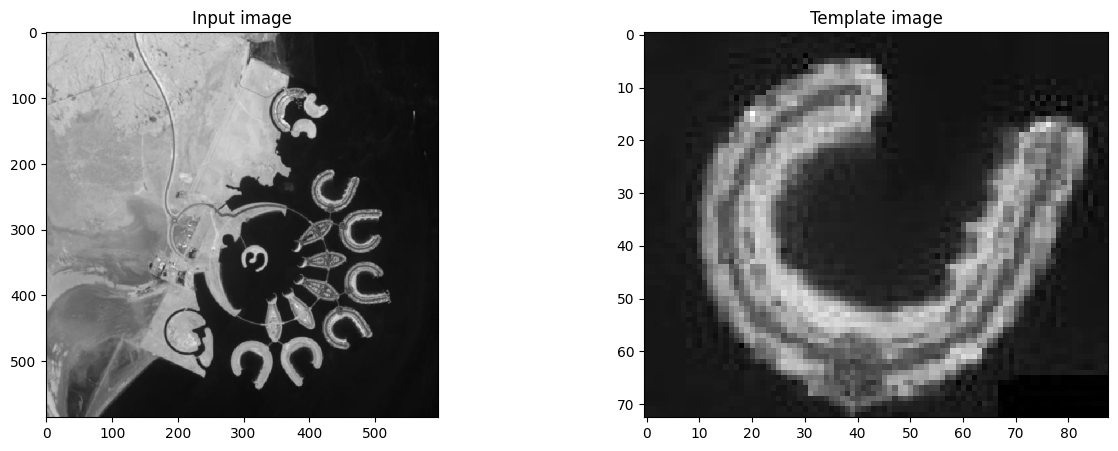

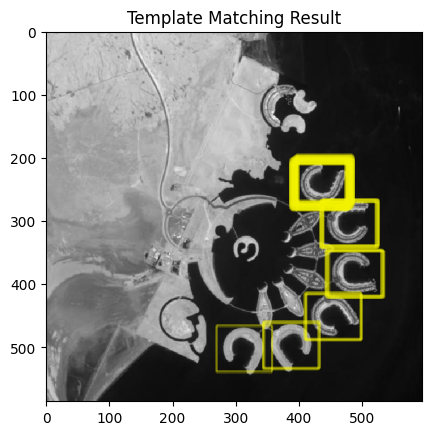

In [96]:
# Example usage
main_image = cv2.imread('/content/drive/MyDrive/PCVK/Object_Detection/bahrain.jpg', 0)
template = cv2.imread('/content/drive/MyDrive/PCVK/Object_Detection/bahrain-template.jpg', 0)

# Print input image and template
f, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].imshow(main_image, cmap='gray'), axarr[0].set_title("Input image")
axarr[1].imshow(template, cmap='gray'), axarr[1].set_title("Template image")
plt.show()

# Perform template matching and display the result
matched_result = template_matching(main_image, template, threshold=0.45)

4. Implementasi metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection

In [39]:
def edge_detection(image, method):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Remove noise using GaussianBlur
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)

    # Apply the selected edge detection method
    if method == 'sobel':
        # Sobel edge detection
        edges_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
        edges_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
        edges = cv2.addWeighted(cv2.convertScaleAbs(edges_x), 0.5, cv2.convertScaleAbs(edges_y), 0.5, 0)
    elif method == 'canny':
        # Canny edge detection
        edges = cv2.Canny(blurred, 50, 150)
    elif method == 'laplacian':
        # Laplacian edge detection with Gaussian blur
        edges = cv2.Laplacian(blurred, cv2.CV_64F)
        # Thresholding to reduce noise
        _, edges = cv2.threshold(edges, 30, 255, cv2.THRESH_BINARY)
    else:
        raise ValueError("Invalid edge detection method. Use 'sobel', 'canny', or 'laplacian'.")

    # Convert edges to uint8 format
    edges = np.uint8(edges)

    return edges

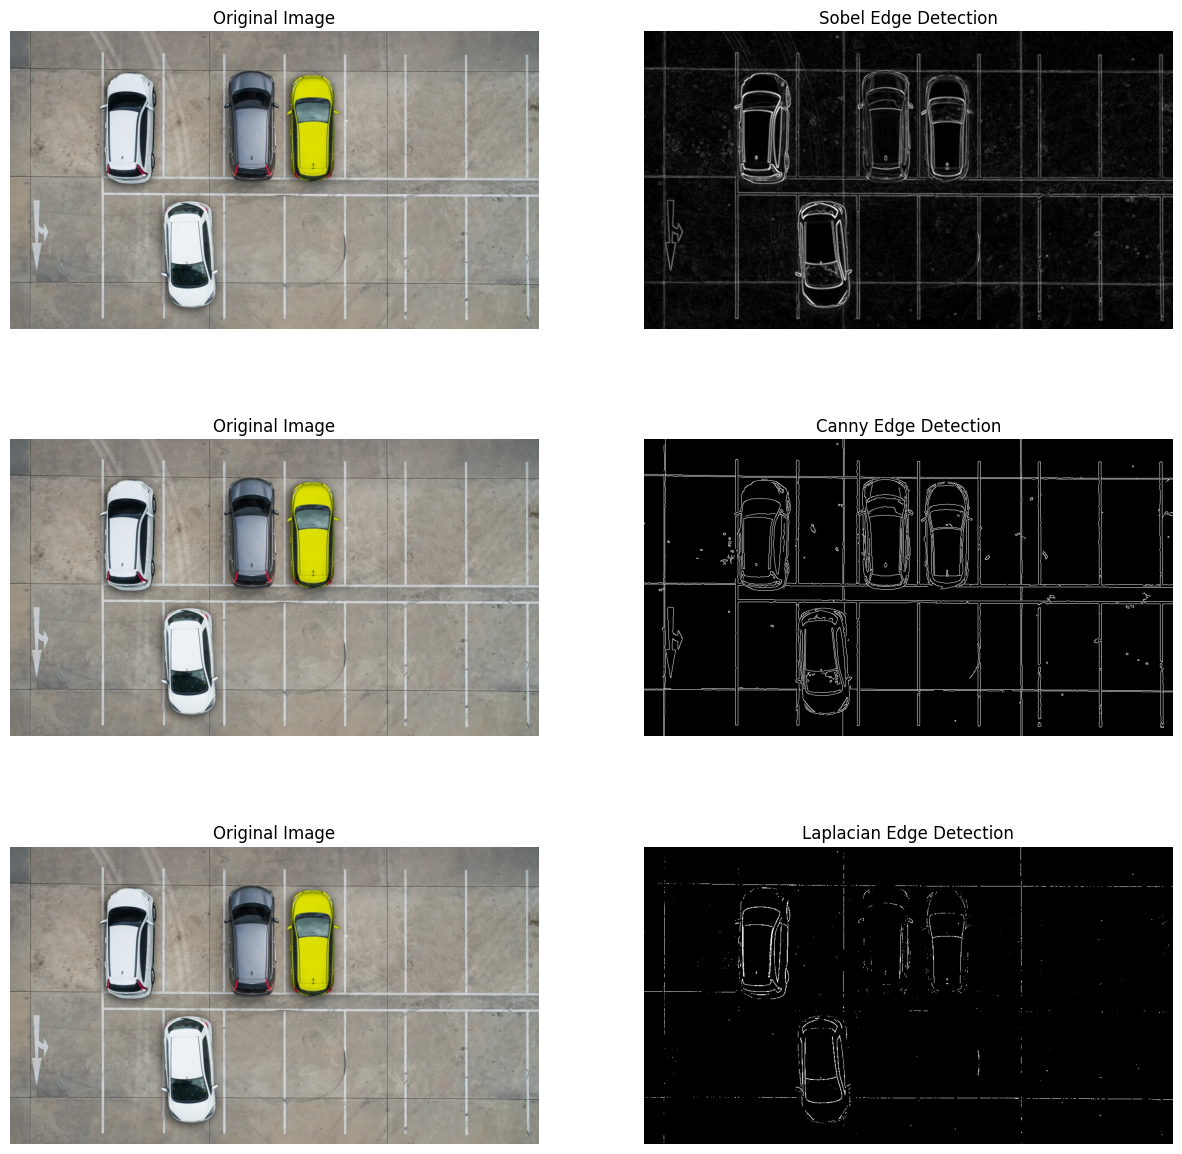

In [40]:
# Example usage:
image_path = '/content/drive/MyDrive/PCVK/Object_Detection/car-park.jpg'
image = cv2.imread(image_path)

# List of edge detection methods
edge_methods = ['sobel', 'canny', 'laplacian']

# Display the original and edge-detected images for each method using matplotlib
plt.figure(figsize=(15, 5 * len(edge_methods)))

for i, edge_method in enumerate(edge_methods, 1):
    # Call the function
    edges_detected = edge_detection(image, edge_method)

    # Original Image
    plt.subplot(len(edge_methods), 2, 2 * i - 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Edge-detected Image
    plt.subplot(len(edge_methods), 2, 2 * i)
    plt.imshow(edges_detected, cmap='gray')
    plt.title(f'{edge_method.capitalize()} Edge Detection')
    plt.axis('off')

plt.show()

5. Implementasi metode Harris Corner Detection dan Shi-Tomasi Detection

In [43]:

def harris_corner_detection(input_img):
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

    # Harris Corner Detection
    gray_img = np.float32(gray_img)
    harris_output = cv2.cornerHarris(gray_img, 2, 3, 0.04)

    # Dilate to mark the corners
    harris_output = cv2.dilate(harris_output, None)

    # Threshold to optimize values
    input_img[harris_output > 0.01 * harris_output.max()] = [0, 0, 255]

    return input_img

def shi_tomasi_corner_detection(input_img):
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

    # Shi-Tomasi Corner Detection
    corners = cv2.goodFeaturesToTrack(gray_img, 100, 0.01, 10)
    corners = np.int0(corners)

    # Draw circles around the corners
    for i in corners:
        x, y = i.ravel()
        cv2.circle(input_img, (x, y), 3, 255, 2)

    return input_img

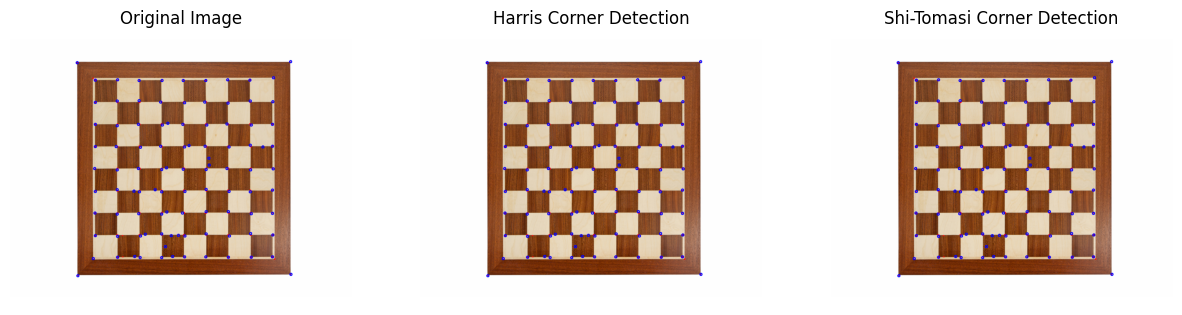

In [46]:

# Example usage:
image_path = '/content/drive/MyDrive/PCVK/Object_Detection/chess-board.jpg'
image = cv2.imread(image_path)


# Harris Corner Detection
harris_output_image = harris_corner_detection(image)

# Shi-Tomasi Corner Detection
shi_tomasi_output_image = shi_tomasi_corner_detection(image)

# Display the original and corner-detected images using matplotlib
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Harris Corner Detection
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(harris_output_image, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')

# Shi-Tomasi Corner Detection
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(shi_tomasi_output_image, cv2.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corner Detection')
plt.axis('off')

plt.show()

6. Implementasi metode Hough Transform

In [47]:
def detect_and_draw_lines(image_path, filter_lines=True):
    # Read the image
    input_img = cv2.imread(image_path)

    # Convert the image to grayscale
    img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(img_gray, 90, 150, apertureSize=3)

    # Dilate edges
    kernel_dilate = np.ones((3, 3), np.uint8)
    edges = cv2.dilate(edges, kernel_dilate, iterations=1)

    # Erode edges
    kernel_erode = np.ones((5, 5), np.uint8)
    edges = cv2.erode(edges, kernel_erode, iterations=1)

    # Perform Hough Line Transform
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

    # Check if any lines were found
    if lines is None or not lines.any():
        print('No lines were found')
        return

    # Filter similar lines
    if filter_lines:
        rho_threshold = 15
        theta_threshold = 0.1

        similar_lines = {i: [] for i in range(len(lines))}
        for i in range(len(lines)):
            for j in range(len(lines)):
                if i == j:
                    continue

                rho_i, theta_i = lines[i][0]
                rho_j, theta_j = lines[j][0]
                if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                    similar_lines[i].append(j)

        indices = [i for i in range(len(lines))]
        indices.sort(key=lambda x: len(similar_lines[x]))

        line_flags = len(lines) * [True]
        for i in range(len(lines) - 1):
            if not line_flags[indices[i]]:
                continue
            for j in range(i + 1, len(lines)):
                if not line_flags[indices[j]]:
                    continue
                rho_i, theta_i = lines[indices[i]][0]
                rho_j, theta_j = lines[indices[j]][0]
                if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                    line_flags[indices[j]] = False

        print('Number of Hough lines:', len(lines))

        filtered_lines = [lines[i] for i in range(len(lines)) if line_flags[i]]

        print('Number of filtered lines:', len(filtered_lines))
    else:
        filtered_lines = lines

    # Draw lines on the image
    for line in filtered_lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv2.line(input_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Display the image
    plt.figure(figsize=(20, 10))
    plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
    plt.show()

Number of Hough lines: 33
Number of filtered lines: 20


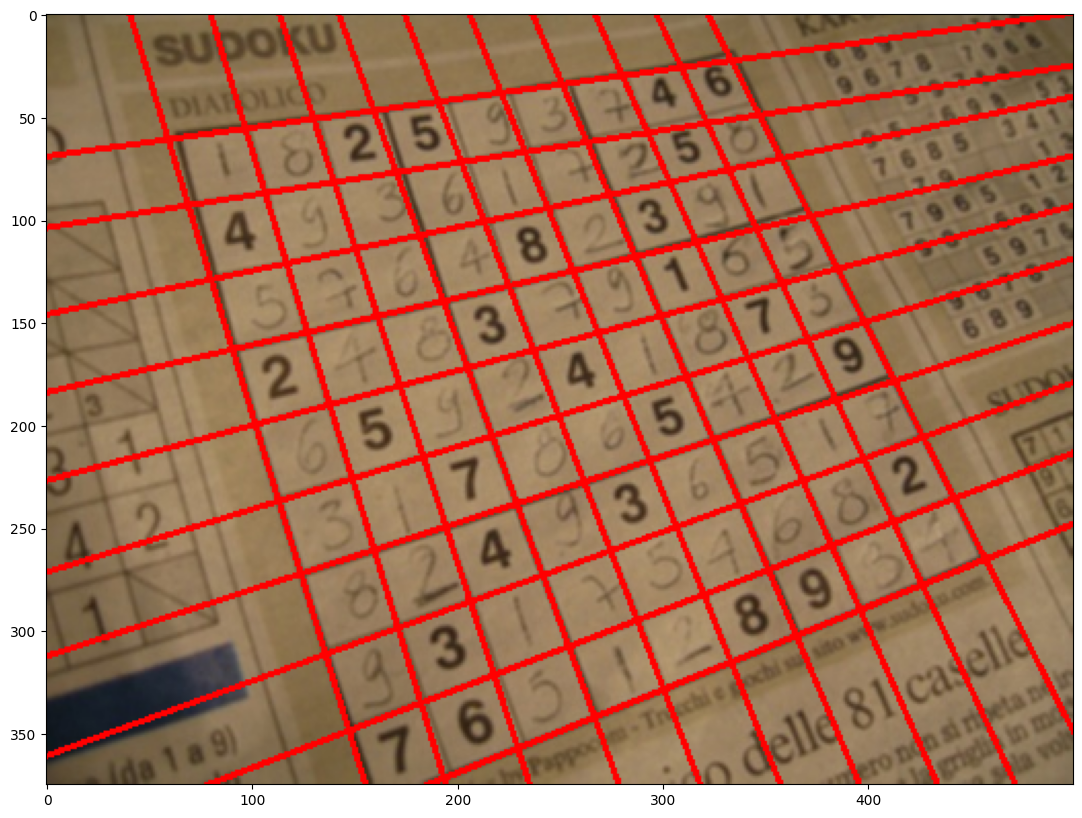

In [48]:
image_path = '/content/drive/MyDrive/PCVK/Object_Detection/sudoku.jpg'
detect_and_draw_lines(image_path)

7. Implementasi fungsi findContours()

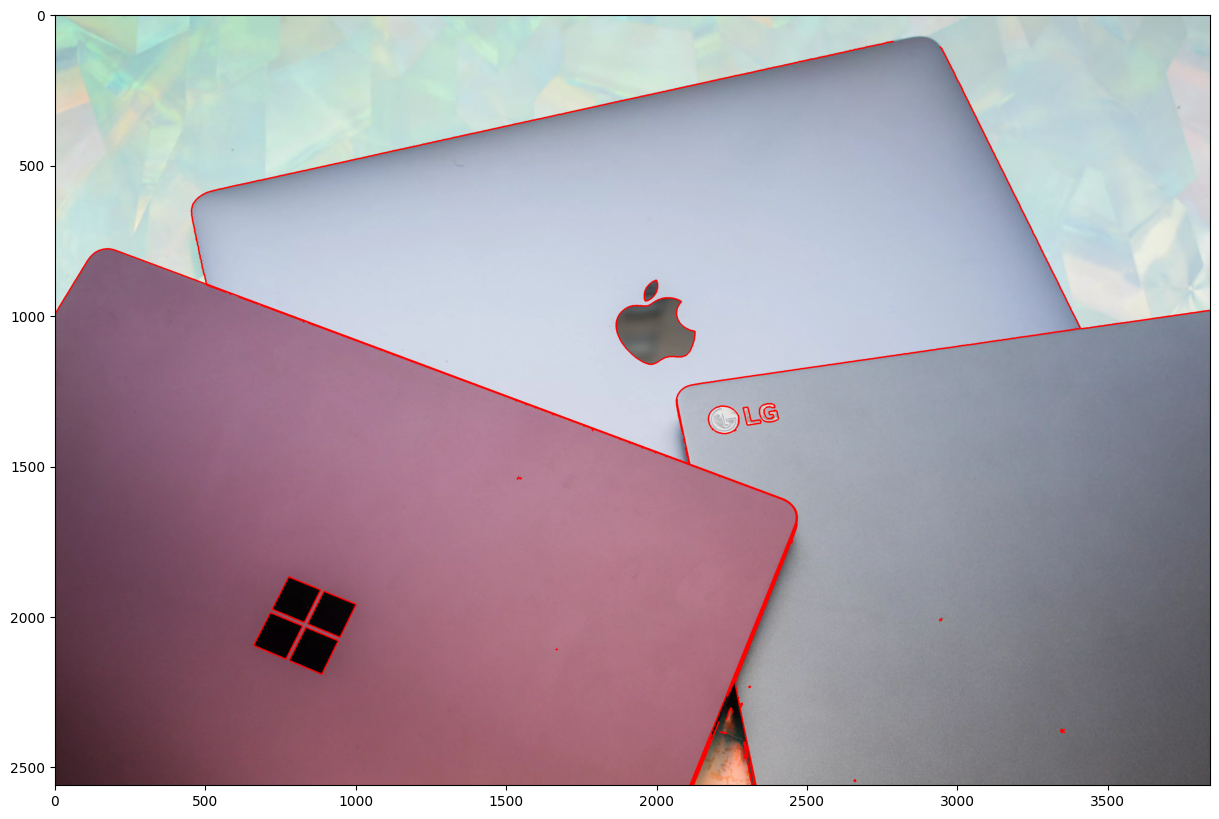

In [50]:

img = cv2.imread('/content/drive/MyDrive/PCVK/Object_Detection/laptop.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edged = cv2.Canny(img_gray, 30, 200)

contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## **Pengayaan Materi KTP**

1. Import library & image

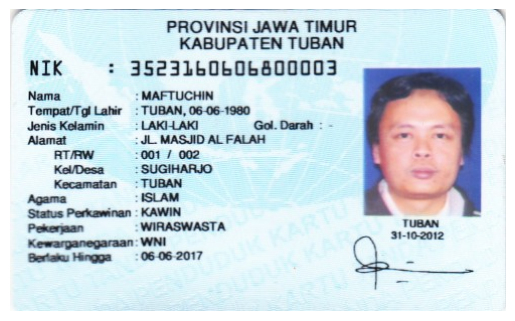

In [53]:
import cv2
import os

img = cv2.imread('/content/drive/MyDrive/PCVK/KTP/ktp3.png')

plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

2.  Lokalisasi dataset dan pembacaan file name di dalam direktori dataset

In [57]:
# Lokasi hasil ktp
path_ktp = "/content/drive/MyDrive/PCVK/KTP"

# List untuk menyimpan nama file di direktori
file_names = []

# Looping file di direktori
for name_file in sorted(os.listdir(path_ktp)):
    # Mendapatkan path lengkap file
    file_path = os.path.join(path_ktp, name_file)

    # Membaca gambar dari file
    src = cv2.imread(file_path)

    # Check if image is successfully loaded
    if src is not None:
        # Operasi lain yang ingin Anda lakukan pada gambar
        blurred = src.copy()
        gray = blurred.copy()

        # Menambahkan nama file ke dalam list
        file_names.append(name_file)
    else:
        print(f"Failed to read image: {file_path}")

# Menampilkan daftar nama file
for file_name in file_names:
    print("Nama file:", file_name)

Failed to read image: /content/drive/MyDrive/PCVK/KTP/.ipynb_checkpoints
Nama file: ktp.png
Nama file: ktp1.png
Nama file: ktp2.png
Nama file: ktp3.png
Nama file: ktp4.png
Nama file: ktp5.png
Nama file: ktp6.png
Nama file: ktp7.jpeg


3. Menerapkan Gaussian Blur

In [58]:
# Filtering
for i in range(10):
 blurred = cv2.GaussianBlur(img, (5, 5), 0.5)

4. Konversi grayscale untuk setiap hasil citra yang tereduksi noise dan binerisasi citra.

168.0 (300, 493)


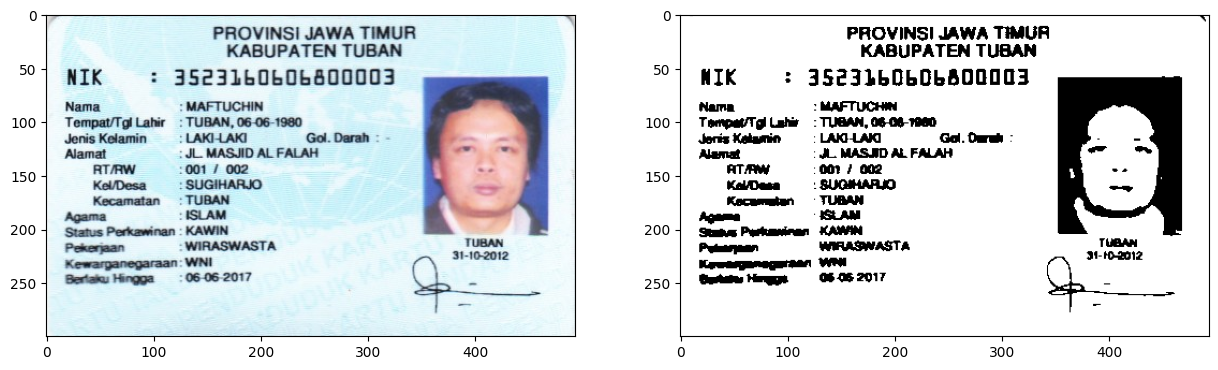

In [59]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)
# Tampilkan gambar asli dan hasil deteksi tepi
f, axarr = plt.subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axarr[1].imshow(bw, cmap='gray')
plt.show()

5. Menerapkan morfologi

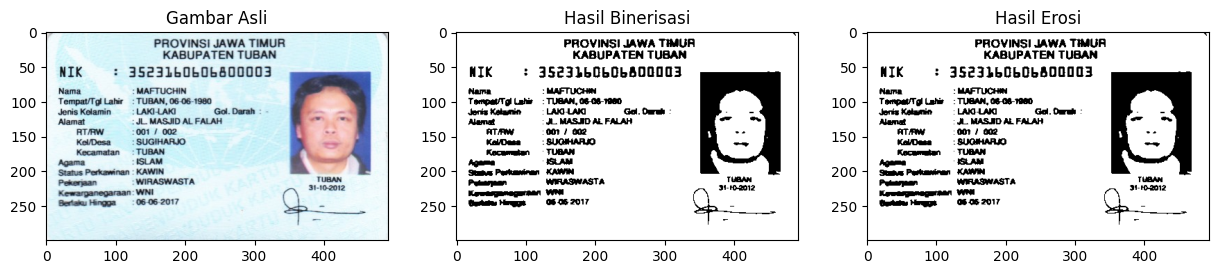

In [60]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Terapkan operasi morfologi erosi
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Tampilkan gambar asli, hasil deteksi tepi, dan hasil erosi
f, axarr = plt.subplots(1, 3, figsize=(15, 5))
axarr[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axarr[0].set_title("Gambar Asli")
axarr[1].imshow(bw, cmap='gray')
axarr[1].set_title("Hasil Binerisasi")
axarr[2].imshow(erode, cmap='gray')
axarr[2].set_title("Hasil Erosi")
plt.show()

6. Menerapkan ekstraksi kontur

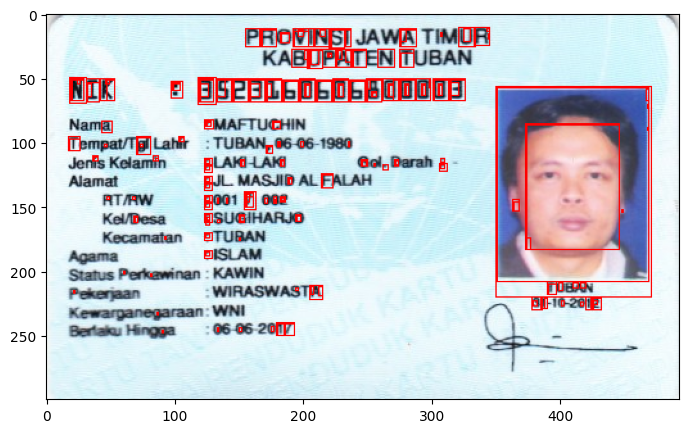

In [62]:
blurred = cv2.GaussianBlur(img, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## **Tugas Kelompok 2**

1. Load image

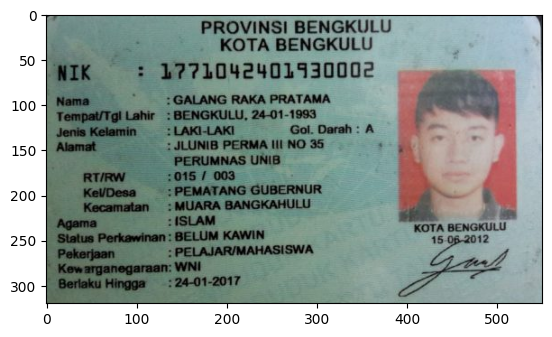

In [67]:
ktp_kelompok = cv2.imread('/content/drive/MyDrive/PCVK/KTP/ktp1.png')
ktp_kelompok = ktp_kelompok[0:320, 30:580]

# Tampilkan KTP
plt.imshow(cv2.cvtColor(ktp_kelompok, cv2.COLOR_BGR2RGB))
plt.show()

In [69]:
def extract_and_draw_contours(image):
    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(image, (5, 5), 0.5)

    # Convert to grayscale
    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

    # Thresholding using Otsu's method
    ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Erode the binary image
    erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

    # Extract contours
    contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    # Loop through contours
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        ras = format(w / h, '.2f')

        # Adjust the conditions based on your requirements
        if h >= 40 and w >= 10 and float(ras) <= 1:
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
        elif h >= 8 and w >= 8 and float(ras) <= 10:
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
        elif h >= 10 and w >= 7 and float(ras) <= 8:
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

    return image

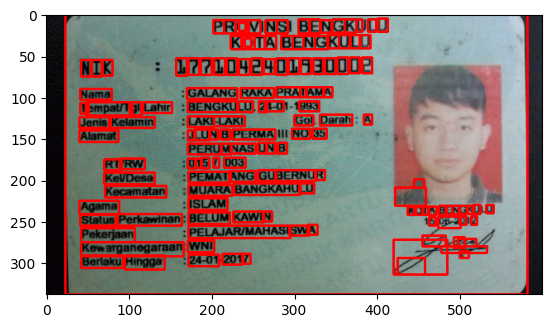

In [70]:
ktp_kelompok = cv2.imread('/content/drive/MyDrive/PCVK/KTP/ktp1.png')

# Call the function
result_image = extract_and_draw_contours(ktp_kelompok)
# Display the result
result_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
plt.imshow(result_rgb)
plt.show()